In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn wordcloud


In [2]:
import pandas as pd
import random

# Base reviews for each class
positive_reviews = [
    "Amazing quality and fabric, loved it!",
    "Excellent fit and very comfortable",
    "Fantastic product, worth the price",
    "Loved the design and material",
    "Great color and perfect fit",
    "Best purchase ever, very satisfied",
    "Stylish and comfortable",
    "Awesome t-shirt, great fabric",
    "Perfect for daily wear, excellent",
    "Premium look and feel"
]

negative_reviews = [
    "Worst product ever, waste of money",
    "Very bad fabric quality, looks cheap",
    "Stitching is poor, not recommended",
    "Terrible experience, do not buy",
    "Color faded after first wash",
    "Material feels cheap, uncomfortable",
    "Size was totally wrong",
    "Completely disappointed",
    "Worst fitting ever, very loose",
    "Do not waste your money"
]

neutral_reviews = [
    "Okay for the price, nothing special",
    "Average product, not very impressive",
    "Decent quality but could be better",
    "Looks fine, fits okay",
    "Product is alright, slight color difference",
    "Mediocre experience",
    "Okay product for casual wear",
    "Average design, basic quality",
    "Value for money, not premium",
    "Not bad, but not great"
]

# Expand dataset to 100+ reviews
data = {
    'review': random.choices(positive_reviews, k=40) +
              random.choices(negative_reviews, k=40) +
              random.choices(neutral_reviews, k=40),
    'rating': [random.randint(4,5) for _ in range(40)] +
              [random.randint(1,2) for _ in range(40)] +
              [3 for _ in range(40)]
}

df_reviews = pd.DataFrame(data)
print("✅ Dataset Created:", df_reviews.shape)
print(df_reviews.head())


✅ Dataset Created: (120, 2)
                               review  rating
0         Great color and perfect fit       5
1  Excellent fit and very comfortable       5
2   Perfect for daily wear, excellent       4
3  Fantastic product, worth the price       5
4       Loved the design and material       4


In [3]:
import re, string

# Label Sentiment
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df_reviews['Sentiment'] = df_reviews['rating'].apply(label_sentiment)

# Clean Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

df_reviews['Cleaned_Review'] = df_reviews['review'].apply(clean_text)

# Remove empty rows
df_reviews = df_reviews[df_reviews['Cleaned_Review'].str.strip() != ""]
print("✅ Preprocessing Complete. Class Distribution:")
print(df_reviews['Sentiment'].value_counts())


✅ Preprocessing Complete. Class Distribution:
Sentiment
Positive    40
Negative    40
Neutral     40
Name: count, dtype: int64


/tmp/ipython-input-4-136311912.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df_reviews, palette='viridis')


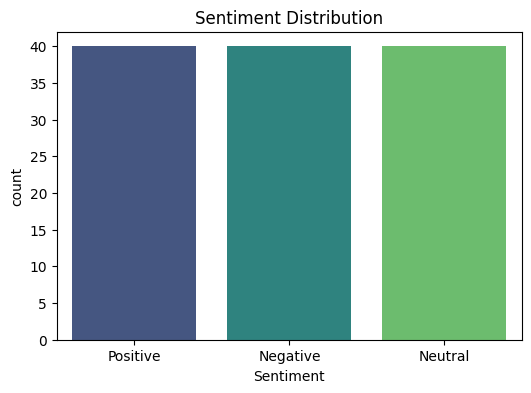

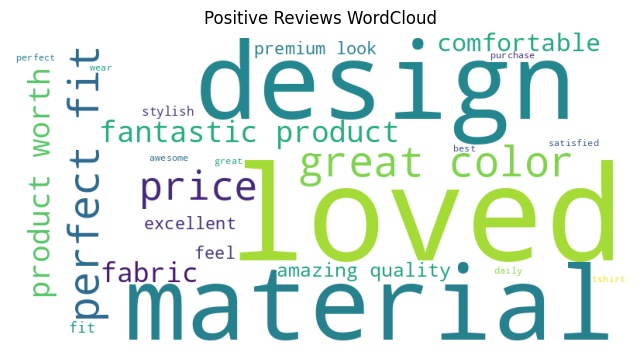

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df_reviews, palette='viridis')
plt.title("Sentiment Distribution")
plt.show()

# WordCloud for Positive Reviews
positive_text = " ".join(df_reviews[df_reviews['Sentiment'] == 'Positive']['Cleaned_Review'])
wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(8, 6))
plt.imshow(wc)
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df_reviews['Cleaned_Review']
y = df_reviews['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("✅ TF-IDF Shapes:", X_train_tfidf.shape, X_test_tfidf.shape)


✅ TF-IDF Shapes: (96, 82) (24, 82)



✅ Naive Bayes Accuracy: 100.00%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         8
     Neutral       1.00      1.00      1.00         8
    Positive       1.00      1.00      1.00         8

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24


✅ Logistic Regression Accuracy: 100.00%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         8
     Neutral       1.00      1.00      1.00         8
    Positive       1.00      1.00      1.00         8

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24


✅ SVM Accuracy: 100.00%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         8
     Neutral       1.00      1

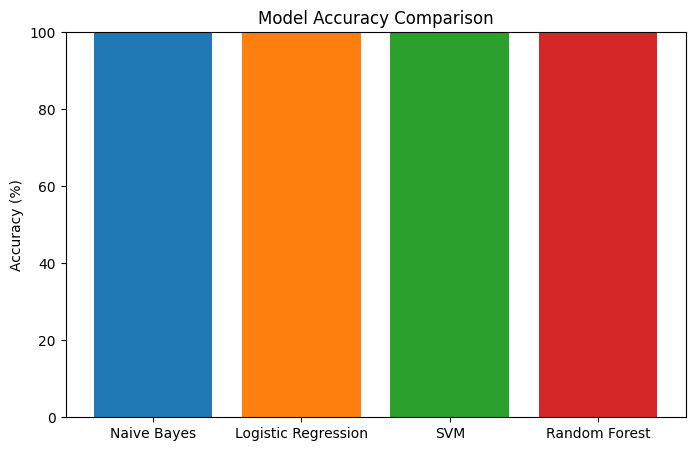

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []
for name, clf in models.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": round(acc*100, 2)})
    print(f"\n✅ {name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred))

results_df = pd.DataFrame(results)
print("\n✅ Model Comparison:\n", results_df)

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(results_df["Model"], results_df["Accuracy"], color=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()


In [7]:
# Select the best model (e.g., SVM)
best_model = models["SVM"]

def predict_sentiment(review_text):
    if not review_text.strip():
        return "Invalid input: Empty review text"
    text_cleaned = review_text.lower()
    text_cleaned = re.sub(r"http\S+", "", text_cleaned)
    text_cleaned = text_cleaned.translate(str.maketrans("", "", string.punctuation))
    text_tfidf = tfidf.transform([text_cleaned])
    return best_model.predict(text_tfidf)[0]

# Test Predictions
print(predict_sentiment("This t-shirt quality is amazing!"))
print(predict_sentiment("Worst purchase ever, very disappointed"))
print(predict_sentiment("It is okay for the price"))


Positive
Negative
Neutral


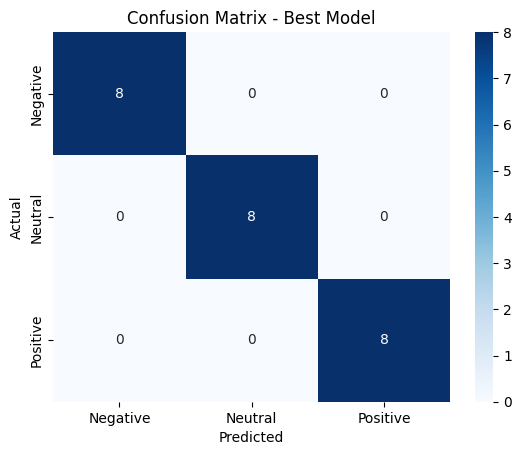

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, best_model.predict(X_test_tfidf), labels=best_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LinearSVC(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 1}
Best Score: 0.9375


In [10]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('model', LinearSVC())
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('model', LinearSVC())])

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train_tfidf, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Average:", scores.mean())


Cross-validation scores: [1.         0.89473684 0.94736842 0.68421053 1.        ]
Average: 0.9052631578947368


In [23]:
!pip install streamlit pyngrok joblib


In [24]:
!ngrok config add-authtoken 2vKoIULBbf0XavUW6Lqhvivvgzq_7Rnhh8ZkS9pP1g7db4fia


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [25]:
import joblib

# Save best model and TF-IDF vectorizer
joblib.dump(best_model, "best_model.pkl")
joblib.dump(tfidf, "tfidf.pkl")
print("✅ Model and Vectorizer Saved!")


✅ Model and Vectorizer Saved!


In [26]:
%%writefile app.py
import streamlit as st
import re, string
import joblib

st.title("🛍️ Myntra Review Sentiment Analysis")
st.write("Enter a product review to check its sentiment!")

# Load Model & TF-IDF
model = joblib.load("best_model.pkl")
tfidf = joblib.load("tfidf.pkl")

review = st.text_area("Type your review here:")

if st.button("Predict"):
    if review.strip() == "":
        st.error("Please enter a review.")
    else:
        # Clean text
        text_cleaned = review.lower()
        text_cleaned = re.sub(r"http\S+", "", text_cleaned)
        text_cleaned = text_cleaned.translate(str.maketrans("", "", string.punctuation))

        # Predict
        review_tfidf = tfidf.transform([text_cleaned])
        prediction = model.predict(review_tfidf)[0]
        st.success(f"✅ Predicted Sentiment: **{prediction}**")


Overwriting app.py


In [27]:
!streamlit run app.py --server.port 8501 &>/dev/null&


In [28]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("✅ Streamlit App is Live at:", public_url)


✅ Streamlit App is Live at: NgrokTunnel: "https://16fad99e3c3b.ngrok-free.app" -> "http://localhost:8501"
